# Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
# input
symbol = 'ACC.NS'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,1110.000000,1115.000000,1101.300049,1108.449951,980.100525,66461
2014-01-02,1110.099976,1122.150024,1093.000000,1097.599976,970.506714,310453
2014-01-03,1086.050049,1094.500000,1081.150024,1088.949951,962.858521,186172
2014-01-06,1088.000000,1094.599976,1071.099976,1085.000000,959.365845,144416
2014-01-07,1087.599976,1094.199951,1071.199951,1085.199951,959.542542,297558


In [4]:
dataset.shape

(1146, 6)

In [5]:
X = dataset.iloc[ : , 0:4].values
Y = dataset.iloc[ : ,  4].values

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [8]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)

In [9]:
# Linear Model
lg = LinearRegression()

# Fit
lg.fit(X_, Y)

# Obtain coefficients
lg.coef_

array([ 2.36508712e-07,  8.13202782e+00, -1.03464941e+00, -1.07334295e+01,
        7.12948742e+00,  9.04907024e-02, -1.14141970e-01, -5.92536832e-02,
       -1.72089994e-02, -1.20083121e-02,  1.18529234e-01,  2.14869649e-02,
       -2.73113864e-02,  8.17381357e-03, -1.05815487e-02, -7.80191104e-04,
        1.55794720e-03,  1.61336406e-03, -8.80140328e-04, -4.45650453e-04,
       -2.88620769e-03,  7.03412561e-04, -9.88045590e-04,  1.66163305e-03,
       -2.84031092e-04,  1.04735411e-04,  6.09049484e-04, -4.73401473e-04,
        2.67776092e-03, -3.68182254e-03,  1.93450462e-03,  1.14600960e-04,
       -2.02515064e-03,  3.00682636e-03, -1.53876008e-03])

In [10]:
lg.intercept_

-1236.1293436258002

In [11]:
lg.score(X_, Y)

0.9807584792460717

In [12]:
# Predict
lg.predict(X_test_[[0]])

array([1368.07784945])

In [13]:
X = dataset.iloc[:,0:1].values
Y = dataset.iloc[:,4].values

In [14]:
poly=PolynomialFeatures(degree=3)
poly_x=poly.fit_transform(X)

regressor=LinearRegression()
regressor.fit(poly_x,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

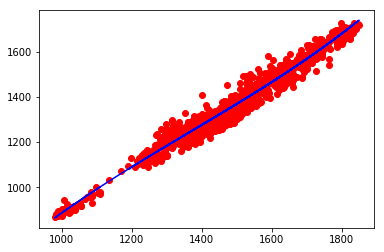

In [15]:
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(poly.fit_transform(X)),color='blue')
plt.show()

Calculate Polynomial of 3rd order using one independent variable

In [16]:
X = np.array(dataset['Open'].values)
Y = np.array(dataset['Adj Close'].values)

In [17]:
from scipy import *

f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p)

          3            2
4.43e-07 x - 0.001814 x + 3.399 x - 1142


Polynomial of multiple independent variables

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [19]:
X = np.array(dataset[['Open', 'High', 'Low']].values)
Y = np.array(dataset['Adj Close'].values)

In [20]:
Y = Y.reshape(1172, -1)

ValueError: cannot reshape array of size 1146 into shape (1172,newaxis)

In [21]:
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 980.1005249   970.50671387  962.85852051 ... 1566.56506348 1562.21813965
 1567.56811523].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Polynomial Regression with more than One Dimension

In [21]:
pr = PolynomialFeatures(degree=2)

In [22]:
X = np.array(dataset[['High', 'Low']].values)
Y = np.array(dataset['Adj Close'].values)

In [23]:
X_poly = pr.fit_transform(X)

In [24]:
# Pre-processing
from sklearn.preprocessing import StandardScaler

# Normalize the each feature simultaneously
SCALE =  StandardScaler()
SCALE.fit(X)

x_scale = SCALE.transform(X)

Example Polynomial

In [25]:
# Pipeline
from sklearn.pipeline import Pipeline

X = np.array(dataset['Open'].values)
Y = np.array(dataset['Adj Close'].values)
X = X.reshape(1172, -1)
Y = Y.reshape(1172, -1)

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X,Y)
yhat = pipe.predict(Y)
yhat[0:4]

array([[ 3.94746384],
       [ 3.99709476],
       [ 4.12615426],
       [ 4.17579988]])

Different Example Method

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

train_x = np.asanyarray(train[['Open']])
train_y = np.asanyarray(train[['Adj Close']])

test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Adj Close']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[   1.        ,    3.85      ,   14.8225    ],
       [   1.        ,    4.01      ,   16.0801    ],
       [   1.        ,    4.19      ,   17.5561    ],
       ..., 
       [   1.        ,   21.190001  ,  449.01614238],
       [   1.        ,   22.91      ,  524.8681    ],
       [   1.        ,   24.940001  ,  622.00364988]])

In [27]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.98085282  0.00110105]]
Intercept:  [ 0.05505099]


Text(0,0.5,'Adj Close')

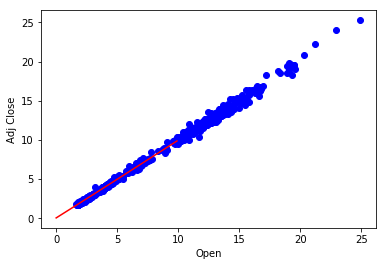

In [28]:
plt.scatter(train[['Open']], train[['Adj Close']],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Open")
plt.ylabel("Adj Close")

In [29]:
# Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.05
R2-score: 1.00
